In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
file_path = '/content/drive/My Drive/Sentiment Analysis Dataset/training.1600000.processed.noemoticon.csv'
df = pd.read_csv(file_path, encoding='latin-1', header=None)

In [ ]:
df.columns = ['target', 'id', 'date', 'flag', 'user', 'tweet']

In [ ]:
df.head()

,target,id,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df = df[['target', 'tweet']]

In [ ]:
df['target'] = df['target'].replace(4, 1)

df['target'] = df['target'].map({0: 'negative', 1 : 'positive'})

df.isnull().sum()
df.dropna(inplace=True)


In [ ]:
print(df['target'].value_counts())


target
negative    800000
positive    800000
Name: count, dtype: int64


In [ ]:
import re

In [ ]:
def replace_url(text):
    return re.sub(r'https?:\/\/\S+|www\.\S+', 'URL', text)


In [ ]:
def replace_mentions(text):
    return re.sub('@\S*', 'user', text, flags=re.IGNORECASE)

In [ ]:
def replace_heart(text):
    return re.sub('<3', 'HEART', text)

In [ ]:
def clean_text(text):
    text = str(text).lower()
    text = replace_url(text)
    text = replace_mentions(text)
    text = replace_heart(text)
    return text

In [ ]:
df['clean_text'] = df['tweet'].apply(clean_text)

In [ ]:
df['clean_text']

,clean_text
0,"user URL - awww, that's a bummer. you shoulda..."
1,is upset that he can't update his facebook by ...
2,user i dived many times for the ball. managed ...
3,my whole body feels itchy and like its on fire
4,"user no, it's not behaving at all. i'm mad. wh..."
...,...
1599995,just woke up. having no school is the best fee...
1599996,thewdb.com - very cool to hear old walt interv...
1599997,are you ready for your mojo makeover? ask me f...
1599998,happy 38th birthday to my boo of alll time!!! ...


In [ ]:
analyzer = SentimentIntensityAnalyzer()

def vader_sentiment_score(text):
    return analyzer.polarity_scores(text)

df['vader_scores'] = df['clean_text'].apply(vader_sentiment_score)
df['compound'] = df['vader_scores'].apply(lambda x: x['compound'])

def get_sentiment(compound):
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'  # This will be dropped in binary eval

df['vader_sentiment'] = df['compound'].apply(get_sentiment)

In [ ]:
df_binary = df[df['vader_sentiment'].isin(['positive', 'negative'])]

In [ ]:
print("Classification Report:")
print(classification_report(df_binary['target'], df_binary['vader_sentiment']))

accuracy = accuracy_score(df_binary['target'], df_binary['vader_sentiment'])
print(f'Accuracy: {accuracy:.4f}')

Classification Report:
              precision    recall  f1-score   support

    negative       0.81      0.57      0.67    584358
    positive       0.66      0.86      0.75    571579

    accuracy                           0.72   1155937
   macro avg       0.74      0.72      0.71   1155937
weighted avg       0.74      0.72      0.71   1155937

Accuracy: 0.7157


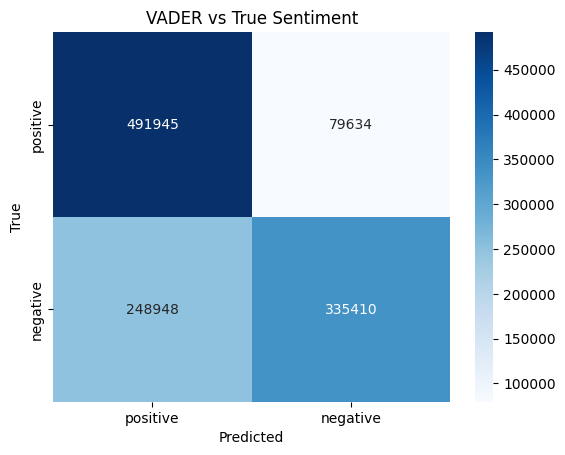

In [ ]:
cm = confusion_matrix(df_binary['target'], df_binary['vader_sentiment'], labels=['positive', 'negative'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'negative'], yticklabels=['positive', 'negative'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('VADER vs True Sentiment')
plt.show()